In [34]:
import math
import random
import os

import numpy as np

from comet_ml import API
from matplotlib import pyplot as plt
import pandas as pd

COMET_API_KEY="bSyRm6vJpAwfehizXic7Fo0bY"
COMET_REST_API_KEY="S3g50KZWG8zEgk1PLzKUn0eEq"

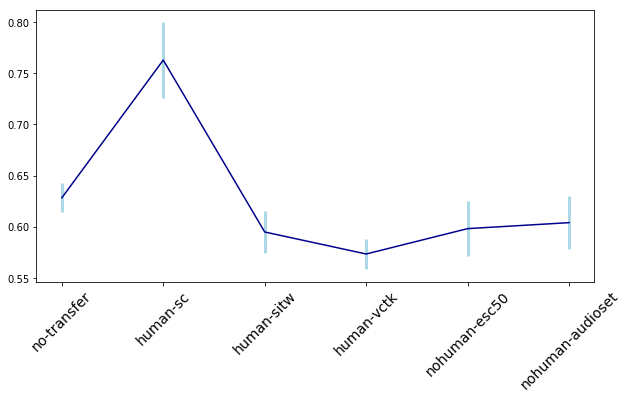

In [35]:
#API.get_experiment_metrics()
client = API(api_key=COMET_API_KEY, rest_api_key=COMET_REST_API_KEY)
experiments = client.get("co-jl-transfer/chillanto")

results = {
    'no-transfer': [],
    'human-sc': [],
    'human-sitw': [],
    'human-vctk': [],
    'nohuman-esc50': [],
    'nohuman-audioset': [],    
}

for exp in experiments:
    tags = client.get_experiment_tags(exp)
    
    if len(tags) > 0 and tags[0] in results.keys():
        tag = tags[0]
        metrics = client.get_experiment_metrics(exp)
        params = client.get_experiment_parameters(exp)
        for metric in metrics:
            if metric['name'] == 'test_F1':
                results[tag].append(metric['valueMax'])
                
#plt.hist(results)
errors = []
xs = []
ys = []
for idx, (k, values) in enumerate(results.items()):
    xs.append(k)
    values = [float(v) for v in values]
    ys.append(np.mean(values))
    errors.append(np.std(values))

fig, ax = plt.subplots(figsize=(10,5))

ax.errorbar(xs, ys, yerr=errors, fmt='-', color='darkblue',
             ecolor='lightblue', elinewidth=3, capsize=0)
#plt.bar(xs,ys, color=['gray', 'blue','blue','blue', 'green','green'])
ax.set_xticklabels(results.keys(), rotation=45, fontsize=14)
plt.show()



In [195]:
#API.get_experiment_metrics()
client = API(api_key=COMET_API_KEY, rest_api_key=COMET_REST_API_KEY)
experiments = client.get("co-jl-transfer/chillanto-noise")

results = {
    'gaussian': {
        'no-transfer': [],
        'human-sc': [],

        'human-sitw': [],
        'human-vctk': [],
        'nohuman-esc50': [],
        'nohuman-audioset': [],    
    },
    'children_playing': {
        'no-transfer': [],
        'human-sc': [],
        'human-sitw': [],
        'human-vctk': [],
        'nohuman-esc50': [],
        'nohuman-audioset': []
    }
}


for exp in experiments:
    noise_type = None
    for param in client.get_experiment_parameters(exp):
        if param['name'] == 'noise_type':
            noise_type = param['valueCurrent']

    if noise_type is None:
        continue

    tags = client.get_experiment_tags(exp)
    if len(tags) > 0 and tags[0] in results['gaussian'].keys():
        tag = tags[0]
        metrics = client.get_experiment_metrics_raw(exp)
        for metric in metrics:
            if metric['metricName'] == 'test_F1':
                results[noise_type][tag].append(float(metric['metricValue']))


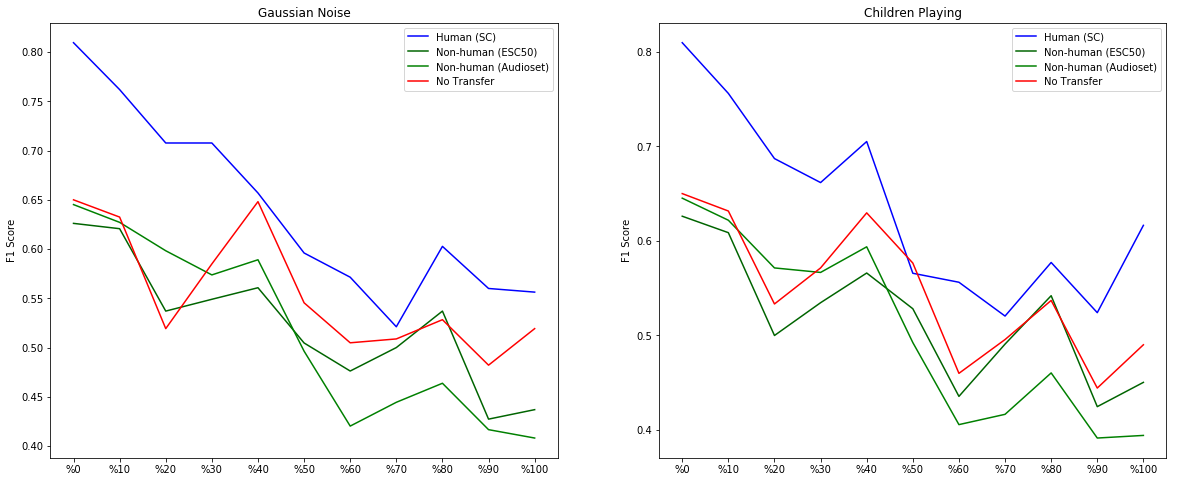

In [207]:
lines = [
    ('human-sc', 'blue', 'Human (SC)'),
    ('nohuman-esc50', 'darkgreen', 'Non-human (ESC50)'),
    ('nohuman-audioset', 'green', 'Non-human (Audioset)'),
    ('no-transfer', 'red', 'No Transfer'),    
]

fig, axs = plt.subplots(figsize=(20,8), ncols=2, sharex=True)
axs[0].set_ylabel("F1 Score")
axs[1].set_ylabel("F1 Score")
plt.xticks(np.arange(11), [f'%{(v) * 10}' for v in range(11)])
for idx, key in enumerate(results.keys()):
#    ys = [ results[key][line] for line, color, label in lines]
#    colors = [ color for _x, color, _ in lines]
#    lbls = [ lbl for _x, color, lbl in lines]
#    print(l)
#    axs[idx].stackplot(range(11), ys,baseline='wiggle', colors=colors, labels=lbls)
    for (line, color, label) in lines: 
        axs[idx].plot(np.arange(11), results[key][line], color=color, label=label)

        
axs[0].set_title("Gaussian Noise")
axs[1].set_title("Children Playing")
axs[0].legend()
axs[1].legend()
plt.show()


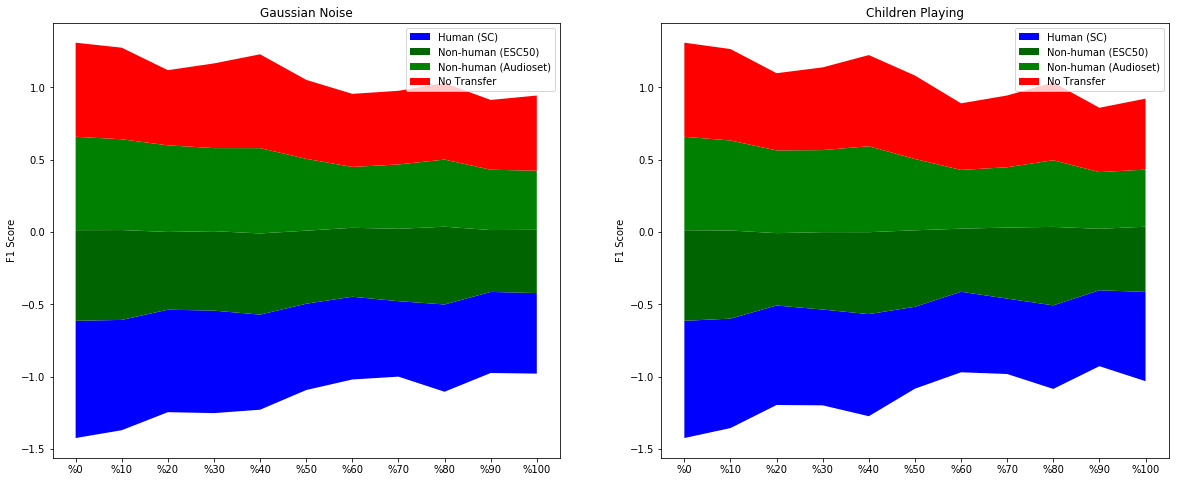

In [208]:
lines = [
    ('human-sc', 'blue', 'Human (SC)'),
    ('nohuman-esc50', 'darkgreen', 'Non-human (ESC50)'),
    ('nohuman-audioset', 'green', 'Non-human (Audioset)'),
    ('no-transfer', 'red', 'No Transfer'),    
]

fig, axs = plt.subplots(figsize=(20,8), ncols=2, sharex=True)
axs[0].set_ylabel("F1 Score")
axs[1].set_ylabel("F1 Score")
plt.xticks(np.arange(11), [f'%{(v) * 10}' for v in range(11)])
for idx, key in enumerate(results.keys()):
    ys = [ results[key][line] for line, color, label in lines]
    colors = [ color for _x, color, _ in lines]
    lbls = [ lbl for _x, color, lbl in lines]
    axs[idx].stackplot(range(11), ys,baseline='wiggle', colors=colors, labels=lbls)

        
axs[0].set_title("Gaussian Noise")
axs[1].set_title("Children Playing")
axs[0].legend()
axs[1].legend()
plt.show()



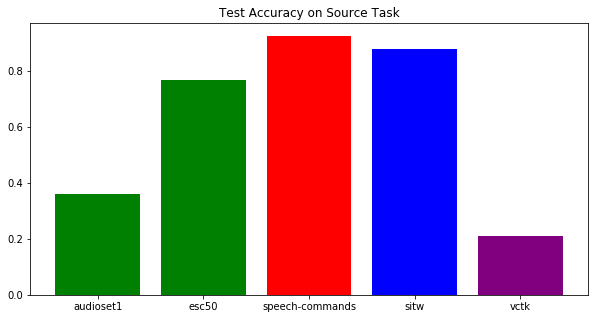

In [225]:
#API.get_experiment_metrics()
client = API(api_key=COMET_API_KEY, rest_api_key=COMET_REST_API_KEY)

projects = ('audioset1-train-and-evaluate',
            'esc50-train-and-evaluate',
            'speech-commands-train-and-evaluate',
            'sitw-train-and-evaluate',
            'vctk-train-and-evaluate')


results = {}

for project in projects:
    best_val = 0.
    experiments = client.get(f"co-jl-transfer/{project}")
    for exp in experiments:
        tags = client.get_experiment_tags(exp)
        if 'candidate' in tags:
            metrics = client.get_experiment_metrics(exp)
            for metric in metrics:
                if metric['name'] == 'test_accuracy':
                    best_val = metric['valueMax']

    results[project.replace('-train-and-evaluate','')] = float(best_val)

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(list(results.keys()), list(results.values()), color=['green', 'green','red','blue', 'purple','darkblue'])
ax.set_title("Test Accuracy on Source Task")
plt.show()